<a href="https://colab.research.google.com/github/hederkosher/CV_HW1/blob/main/CompVision_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict
import random

mnist_data = datasets.MNIST(root='',download=True)


In [ ]:
samples_by_class = {i: [] for i in range(10)}

for img_tensor, label in mnist_data:
    if len(samples_by_class[label]) < 5:
        samples_by_class[label].append(img_tensor)
    if all(len(samples_by_class[i]) >= 5 for i in range(10)):
        break  # stop when we have 5 samples per class

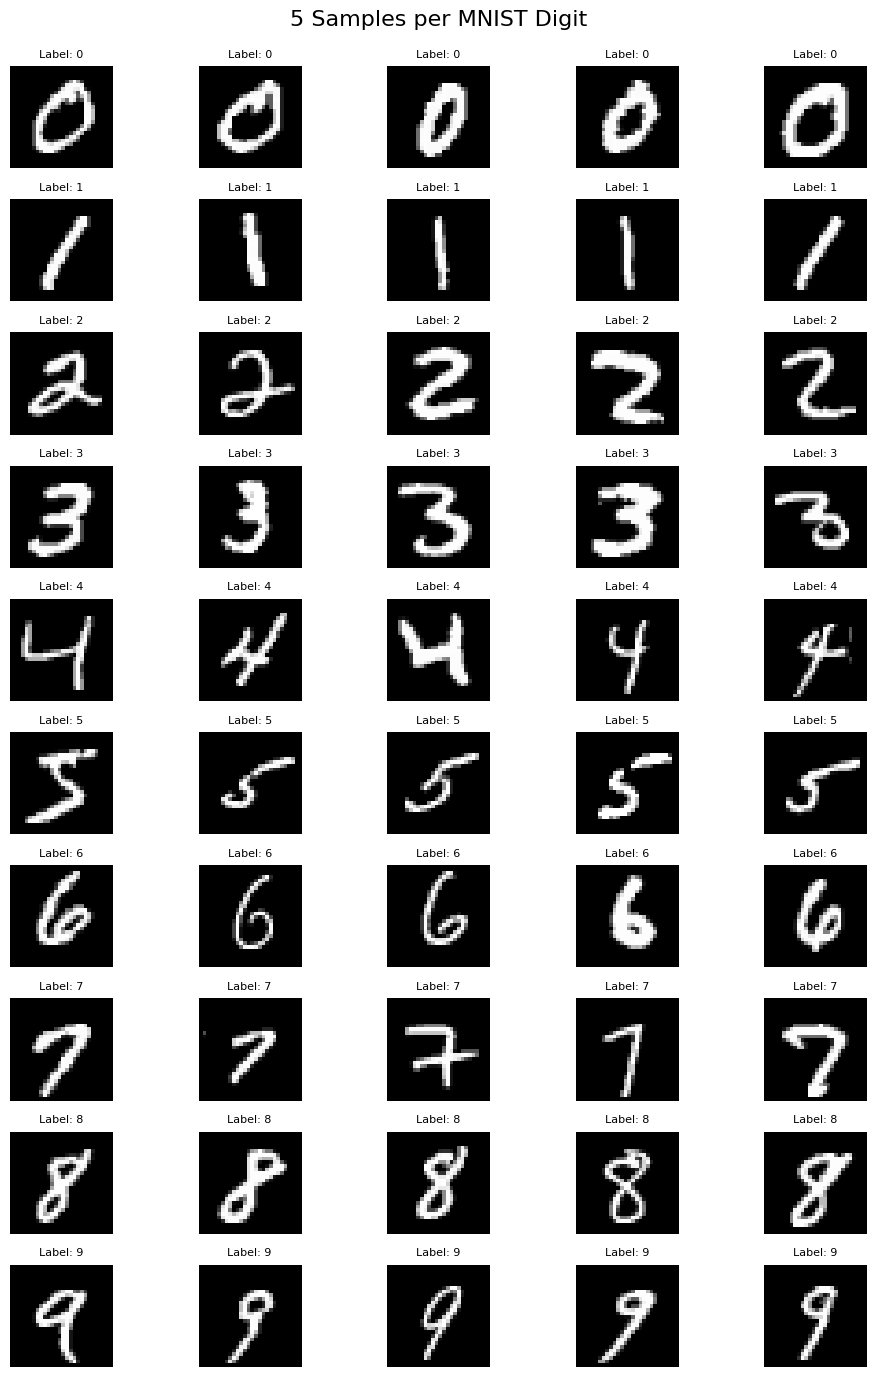

In [ ]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(10, 14))

for digit in range(10):
    for i in range(5):
        img = samples_by_class[digit][i]
        ax = axes[digit][i]

        ax.imshow(img, cmap='gray')
        ax.axis('off')
        ax.set_title(f"Label: {digit}", fontsize=8)

plt.suptitle("5 Samples per MNIST Digit", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

In [ ]:
digit_bank = defaultdict(list)
for img, label in mnist_data:
    digit_bank[label].append(img)

# Step 3: Define 3-digit class space
target_classes = [f"{i:03}" for i in range(101)]  # ['000', '001', ..., '100']
new_dataset = []

for cls in target_classes:
    count = 0
    while count < 4000:
        digits = [int(c) for c in cls]  # e.g., '023' → [0, 2, 3]
        imgs = [random.choice(digit_bank[d]) for d in digits]

        # Concatenate horizontally
        new_img = Image.new('L', (28*3, 28))
        for idx, img in enumerate(imgs):
            if isinstance(img, torch.Tensor):
                img = transforms.ToPILImage()(img)
            new_img.paste(img, (28*idx, 0))

        new_dataset.append((new_img, int(cls)))
        count += 1

print(f"Generated {len(new_dataset)} samples for {len(target_classes)} classes.")

Generated 404000 samples for 101 classes.


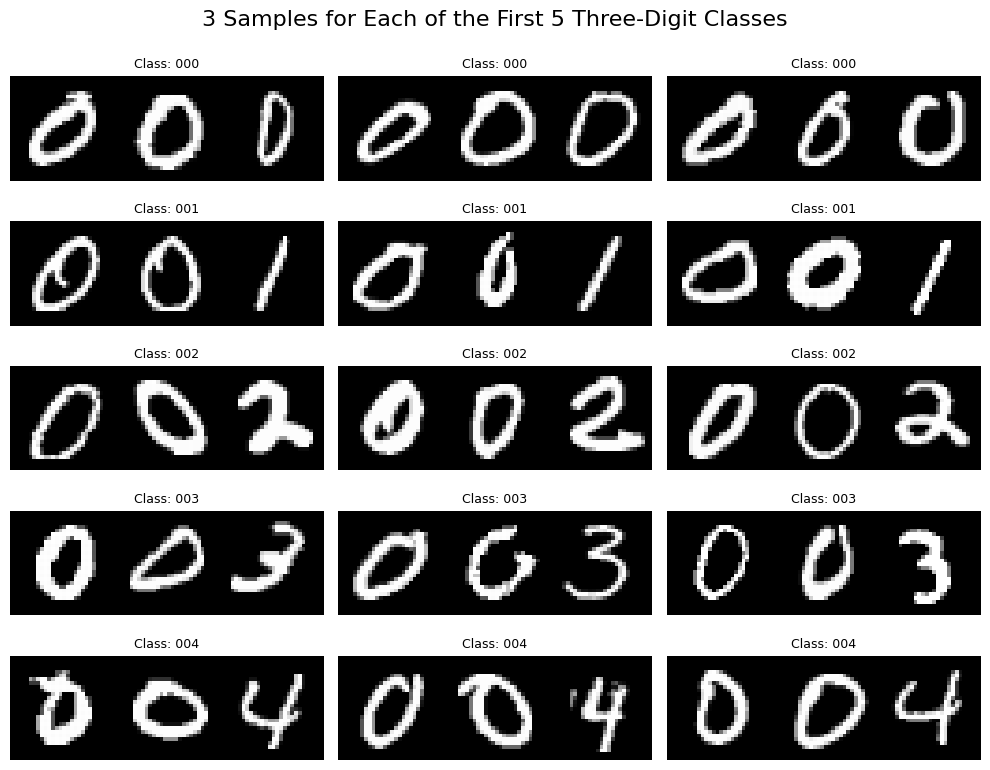

In [ ]:
samples_by_class = {i: [] for i in range(5)}  # 000–004

for img, label in new_dataset:
    if label in samples_by_class and len(samples_by_class[label]) < 3:
        samples_by_class[label].append(img)
    if all(len(samples_by_class[i]) == 3 for i in range(5)):
        break

# Plot them in a 5x3 grid (5 rows = classes, 3 cols = samples)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 8))
fig.suptitle("3 Samples for Each of the First 5 Three-Digit Classes", fontsize=16)

for class_idx in range(5):
    for sample_idx in range(3):
        ax = axes[class_idx, sample_idx]
        img = samples_by_class[class_idx][sample_idx]

        # Convert tensor to NumPy if needed
        if isinstance(img, torch.Tensor):
            img = img.squeeze().numpy()

        ax.imshow(img, cmap='gray')
        ax.set_title(f"Class: {class_idx:03}", fontsize=9)
        ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()